In [51]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from functions_and_objects import (impute_means_zeros_maxs_X,parse_percentage,
                                   clean_LC_data_classification_eval,preprocessing_eval, 
                                   columns_list, nan_max_cols, nan_mean_cols, nan_zero_cols, dtype,
                                   one_hot_encode_eval, concat_X_and_6ohe_dfs,
                                   prep_all_df_for_classification,
                                   classification_model_eval_prep_pipeline)

import joblib
from sklearn.metrics import (accuracy_score, precision_score, recall_score, #classification
                             f1_score, roc_auc_score, roc_curve,precision_recall_fscore_support, #classification
                             r2_score,mean_squared_error) #regression

from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Test Cleaning/Preprocessing Functions

In [2]:
raw_q42017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q4.csv',header=1)
raw_q32017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q3.csv',header=1)
raw_q22017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q2.csv',header=1)
raw_q12017 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2017Q1.csv',header=1)
raw_q42016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q4.csv',header=1)
raw_q32016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q3.csv',header=1)
raw_q22016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q2.csv',header=1)
raw_q12016 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2016Q1.csv',header=1)
raw_2015 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2015.csv',header=1)
raw_2014 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2014.csv',header=1)
raw_2012to2013 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2012to2013.csv',header=1)
raw_2007to2011 = pd.read_csv('~/peervest/lc_data/LoanStats_securev1_2007to2011.csv',header=1)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/

In [3]:
dfs_list = [raw_q42017,raw_q32017,raw_q22017,raw_q12017,
           raw_q42016,raw_q32016,raw_q22016,raw_q12016,raw_2015,
           raw_2014,raw_2012to2013, raw_2007to2011]

In [4]:
(X_train_classif, X_test_classif, y_train_classif, y_test_classif) = classification_model_eval_prep_pipeline(dfs_list)

/home/jupyter/peervest/functions_and_objects.py:195: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  raw_lc_df['earliest_cr_line'] = pd.to_timedelta(pd.to_datetime(raw_lc_df['earliest_cr_line'])).dt.days
/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/home/jupyter/peervest/functions_and_objects.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_train[col] = X_train[col].fillna(0.0)
/home/jupyter/peervest/functions_and_objects.py:149: Setti

In [6]:
print(X_train_classif.shape)
print(y_train_classif.shape)
print(X_test_classif.shape)
print(y_test_classif.shape)

(880950, 1124)
(880950, 1)
(377551, 1124)
(377551, 1)


### Neural Network Classification Model

##### Fit

In [21]:
ss = StandardScaler()
X_train_classif_s = ss.fit_transform(X_train_classif)
X_test_classif_s = ss.transform(X_test_classif)

In [26]:
np.array(y_train_classif['loan_status'])

array([1, 0, 1, ..., 1, 0, 1], dtype=object)

In [76]:
model = Sequential()
n_input = X_train_classif_s.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim=n_input, activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(rate=0.2))
model.add(Dense(562,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dropout(rate=0.2))
model.add(Dense(50,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(10,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.0001)))

In [77]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [78]:
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1, mode='auto')
callbacks_list = [early_stop]

In [79]:
history_log = model.fit(X_train_classif_s, y_train_classif, 
                        validation_data=(X_test_classif_s, y_test_classif), 
                        epochs=7, 
                        callbacks=callbacks_list, 
                        batch_size=500)

Train on 880950 samples, validate on 377551 samples
Epoch 1/7
880950/880950 [==============================] - 429s 487us/step - loss: 0.1415 - acc: 0.9769 - val_loss: 0.1067 - val_acc: 0.9765
Epoch 2/7
880950/880950 [==============================] - 429s 487us/step - loss: 0.0737 - acc: 0.9879 - val_loss: 0.0820 - val_acc: 0.9824
Epoch 3/7
880950/880950 [==============================] - 432s 491us/step - loss: 0.0623 - acc: 0.9895 - val_loss: 0.0706 - val_acc: 0.9859
Epoch 4/7
880950/880950 [==============================] - 424s 482us/step - loss: 0.0534 - acc: 0.9908 - val_loss: 0.0567 - val_acc: 0.9905
Epoch 5/7
880950/880950 [==============================] - 431s 489us/step - loss: 0.0469 - acc: 0.9917 - val_loss: 0.0463 - val_acc: 0.9914
Epoch 6/7
880950/880950 [==============================] - 424s 481us/step - loss: 0.0423 - acc: 0.9922 - val_loss: 0.0485 - val_acc: 0.9897
Epoch 00006: early stopping


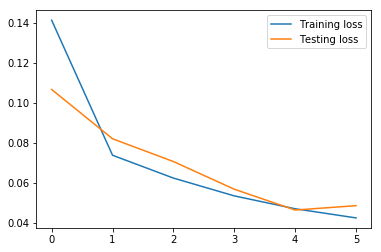

In [80]:
plt.plot(history_log.history['loss'], label='Training loss')
plt.plot(history_log.history['val_loss'], label='Testing loss')
plt.legend();

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1124)              1264500   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1124)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 562)               632250    
_________________________________________________________________
dropout_6 (Dropout)          (None, 562)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 50)                28150     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 11        
Total para

In [81]:
filename = 'nn_v1.joblib'
joblib.dump(model, filename)

['nn_v1.joblib']

##### Predict & Eval

In [40]:
281/10

28.1